# Import Libraries

In [123]:
import folium
import os
import glob
import json
import pandas as pd
import geopandas as gpd
from geojson import Feature, FeatureCollection, Point
import matplotlib.pyplot as plt

# Load all data

In [81]:
df = pd.read_csv(r"data\raw_data_Strassenverkehrsunfaelle\Data_2018-2021_combined.csv", sep=";")
df21 = df[df["ujahr"]==2021].reset_index(drop=True)

C:\Users\p.kollhof\AppData\Local\Temp\ipykernel_7804\1842701868.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"data\raw_data_Strassenverkehrsunfaelle\Data_2018-2021_combined.csv", sep=";")


## Cluster accident types

In [93]:
def get_accs_with_bicycle(df):
    df_bicycles = df[df["istrad"]==1].reset_index(drop=True)
    return df_bicycles

df21_bicycles = get_accs_with_bicycle(df21)

# TESTING

## Display Unfallorte2021 shape file

In [131]:
street_data = gpd.read_file(r"data\raw_data_Strassenverkehrsunfaelle\Unfallorte2021_EPSG25832_Shape\Shapefile\Unfallorte2021_LinRef.shp")

In [143]:
bc_acc_bln = street_data[street_data["ULAND"]=="11"][["geometry"]]
bc_acc_bln.to_json(na="drop")

'{"type": "FeatureCollection", "features": [{"id": "109752", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [791884.0984815247, 5839010.7134271525]}}, {"id": "109997", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [796018.2589072362, 5822739.195586562]}}, {"id": "110369", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [799988.2122465493, 5828912.431352381]}}, {"id": "111540", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [791154.6789977066, 5824616.756804353]}}, {"id": "112173", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [791505.4104665425, 5826555.663850194]}}, {"id": "112176", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [791567.4971564943, 5826545.11543203]}}, {"id": "112179", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [797898.668

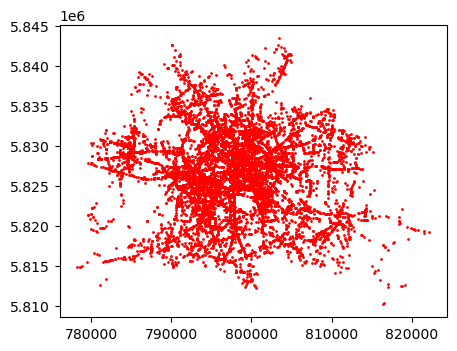

In [147]:
fix, ax = plt.subplots(figsize=(5,5))
bc_acc_bln.plot(ax = ax, markersize=1, color="red")
plt.show()

# Map Creation

## Data for overlays

### Sorted borough data (general)

In [62]:
borough_ids_sorted_str = ["001", "002", "003", "004", "005", "006", "007", "008", "009", "010", "011", "012"]
borough_names_sorted = ["Mitte", "Friedrichshain-Kreuzberg", "Pankow", "Charlottenburg-Wilmersdorf", "Spandau",
"Steglitz-Zehlendorf","Tempelhof-Schöneberg","Neukölln","Treptow-Köpenick",
"Marzahn-Hellersdorf","Lichtenberg","Reinickendorf"]

df_borough_accidents = pd.DataFrame({
    "borough_id" : borough_ids_sorted_str,
    "borough_name" : borough_names_sorted,
    "accidents" : data21["bez"].value_counts().sort_index().values
})

borough_style_dict = {"fillColor": "#00000000","color": "#21469F"}

## Each borough overlayed

In [88]:
[df21["lat"][acc], df21["long"][acc]]

[52.53393955, 13.42689483]

In [96]:
df21_bicycles

,objectid,land,bez,lor,strasse,lor_ab_2021,ujahr,umonat,ustunde,uwochentag,...,istpkw,istfuss,istkrad,istgkfz,istsonstige,ustrzustand,linrefx,linrefy,long,lat
0,219221,11,4,NaN,NaN,4500939.0,2021,12,18,4,...,1,0,0,0,0,0,792439.7595,5824095.448,13.307913,52.488453
1,219214,11,1,NaN,NaN,1100102.0,2021,12,9,2,...,1,0,0,0,0,1,796973.1702,5826579.744,13.376700,52.508275
2,219193,11,5,NaN,NaN,5100209.0,2021,12,18,4,...,1,0,0,0,0,0,783320.2118,5830271.905,13.179228,52.548642
3,219190,11,1,NaN,NaN,1100310.0,2021,12,12,6,...,1,0,0,0,0,0,799021.6282,5828725.878,13.408721,52.526393
4,219189,11,3,NaN,NaN,3601451.0,2021,12,17,5,...,1,0,0,0,0,0,801364.4615,5829700.555,13.444035,52.533839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,112212,11,2,NaN,NaN,2500727.0,2021,8,15,4,...,0,0,0,0,0,0,802141.8982,5827763.741,13.453702,52.516049
4247,112197,11,7,NaN,NaN,7501133.0,2021,6,11,5,...,0,0,0,0,1,0,797513.4757,5818141.142,13.377112,52.432337
4248,112184,11,10,NaN,NaN,10400940.0,2021,7,20,6,...,1,0,0,0,0,0,812566.7795,5827181.034,13.606291,52.504953
4249,112182,11,9,NaN,NaN,9100101.0,2021,9,19,4,...,1,0,0,0,0,1,802664.0378,5825207.751,13.459050,52.492850


In [ ]:
# Create map object
m1 = folium.Map(location=[52.51772755662563, 13.406154972878294], zoom_start=12,
               tiles="OpenStreetMap")

# Global tooltip
tooltip_hover_marker = "Click for more info!"

# Create bicycle icon
icon_bicycle_path = r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Final_Project\_Berlin\data\icons\bicycle_50x50.png"
icon_bicycle = folium.features.CustomIcon(icon_bicycle_path, icon_size=(20,20))

# Create TEST markers
marker_Ironhack = folium.Marker([52.532952379348814, 13.45334618603766], 
                                popup = "<strong>IRONHACK</strong>",
                                tooltip = tooltip_hover_marker).add_to(m1),

marker_home = folium.Marker([52.57295915967568, 13.411971082934471],
                           popup = "<strong>Home</strong>",
                           tooltip = tooltip_hover_marker,
                           icon = folium.Icon(icon="home", color="red")).add_to(m1),

#marker_bicycle = folium.Marker([52.548283, 13.421857],
                           #popup = "<strong>Bicycle Accident</strong>",
                           #icon = folium.Icon(icon="bicycle", 
                                              #color="white",
                                              #icon_color="red",
                                              #icon_size=(10,10),
                                              #prefix="fa")).add_to(m1),

# Create ACCIDENTS-2021 markers

bln_21_bc_accs_geojson = r"data\raw_data_Strassenverkehrsunfaelle\Unfallorte2021_EPSG25832_Shape\Shapefile\Berlin_2021_bicycle_accs.geojson"

for acc in range(len(df21_bicycles)): 
    #folium.Marker([df21_bicycles["lat"][acc], df21_bicycles["long"][acc]],
                   #popup = "<strong>Bicycle Accident</strong>",
                   #icon = folium.Icon(icon="bicycle", 
                                      #color="white",
                                      #icon_color="red",
                                      #icon_size=(3,3),
                                      #shadow_size=(0,0),
                                      #prefix="fa")).add_to(m1),

    folium.GeoJson(data=(open(bln_21_bc_accs_geojson, "r")).read(),
                  marker=folium.Circle(radius=4, fill_color="orange", fill_opacity=0.4, color="black", weight=1)
                  ).add_to(m1), 

# Overlay accident counts per borough
#m1.choropleth(
    #geo_data = boroughs_json_file,
    #name = "Accident Count", 
    #data = df_borough_accidents,
    #columns = ["borough_id", "accidents"],
    #key_on = "feature.properties.Gemeinde_schluessel",
    #fill_color = "Reds",
    #fill_opacity = 0.7,
    #line_opacity = 0.2,
    #legend_name = "Accident Count")

### CREATE OVERLAY ###
borough_json_files = glob.glob(r"data\geo_data\bezirksgrenzen\single_bezirk_jsons\*.geojson")

# All borough individually
#for idx,_ in enumerate(borough_json_files):
    #borough_overlay = folium.GeoJson(borough_json_files[idx], 
                                     #tooltip = borough_names_sorted[idx],
                                     #name = borough_names_sorted[idx],
                                     #style_function = lambda x:borough_style_dict).add_to(m1)
    
# All boroughs together
borough_overlay = folium.GeoJson(boroughs_json_file,
                                style_function = lambda x:borough_style_dict,
                                name = "Borough Demarcation").add_to(m1)
    
folium.LayerControl().add_to(m1)
    
# Save map
m1.save("berlin_boroughs_singles.html")

## All boroughs overlayed

In [43]:
# Create map object
m2 = folium.Map(location=[52.51772755662563, 13.406154972878294], zoom_start=12)

# Global tooltip
tooltip_hover_marker = "Click for more info!"

# Create markers

marker_Ironhack = folium.Marker([52.532952379348814, 13.45334618603766], 
                                popup = "<strong>IRONHACK</strong>",
                                tooltip = tooltip_hover_marker).add_to(m2)

maker_home = folium.Marker([52.57295915967568, 13.411971082934471],
                           popup = "<strong>Home</strong>",
                           tooltip = tooltip_hover_marker,
                           icon = folium.Icon(icon="home", color="red")).add_to(m2)

# Create overlay
boroughs_json_file = r"data\geo_data\bezirksgrenzen\bezirksgrenzen.geojson"

borough_overlay = folium.GeoJson(boroughs_json_file,
                                style_function = lambda x:borough_style_dict,
                                name = "Borough Demarcation").add_to(m2)

# Overlay accident counts per borough
m2.choropleth(
    geo_data = boroughs_json_file,
    name = "Accident Count", 
    data = df_borough_accidents,
    columns = ["borough_id", "accidents"],
    key_on = "feature.properties.Gemeinde_schluessel",
    fill_color = "Reds",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Accident Count")

folium.LayerControl().add_to(m2)
    
# Save map
m2.save("berlin_boroughs_all_boroughs.html")